# EDA

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
df = pd.read_csv('Data/raw_data.csv')
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [17]:
df.drop('Timestamp', axis=1, inplace=True)

In [18]:
df.shape

(2023070, 3)

In [19]:
# Find number of missing values in each column
df.isna().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

In [13]:
df['Rating'] = df['Rating'].astype('int8')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


In [ ]:
# Number of unique user id, product id and rating in the data
df.nunique()

UserId       1210271
ProductId     249274
Rating             5
dtype: int64

In [22]:
# Summary statistics of 'rating' variable
df.describe()

,Rating
count,2.023070e+06
mean,4.149036e+00
std,1.311505e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


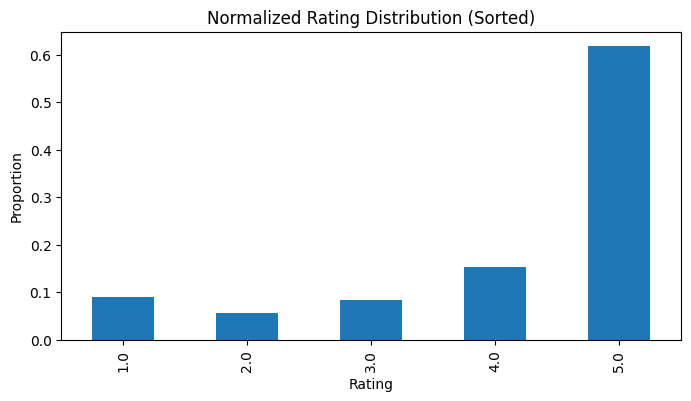

In [26]:
#Create the plot and provide observations

plt.figure(figsize=(8, 4))
df['Rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Proportion')
plt.title('Normalized Rating Distribution (Sorted)')
plt.show()

The distribution is skewed to the right. Over 50% of the ratings are 5, followed by a little below 20% with 4 star ratings. And the percentages of ratings keep going down until below 10% of the ratings are 2 stars.

In [ ]:
# Top, bottom 10 users based on rating
most_rated = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)[:10]
least_rated = df.groupby('UserId')['Rating'].count().sort_values(ascending=False)[-10:]
most_rated, least_rated

(UserId
 A3KEZLJ59C1JVH    389
 A281NPSIMI1C2R    336
 A3M174IC0VXOS2    326
 A2V5R832QCSOMX    278
 A3LJLRIZL38GG3    276
 ALQGOMOY1F5X9     275
 AKMEY1BSHSDG7     269
 A3R9H6OKZHHRJD    259
 A1M04H40ZVGWVG    249
 A1RRMZKOMZ2M7J    225
 Name: Rating, dtype: int64,
 UserId
 AZZW1OIA8GA92            1
 A00275441WYR3489IKNAB    1
 A001917029LKCOSCCWHP6    1
 AZZRS2XK17RFQ            1
 AZZVV7G4PUYXA            1
 A00260721BZWSYAKGDLGW    1
 AZZZU2TD7Q3ET            1
 A00008821J0F472NDY6A2    1
 A000186437REL8X2RW8UW    1
 A0002574WYJMBWKNCPY8     1
 Name: Rating, dtype: int64)

<Axes: ylabel='Count'>

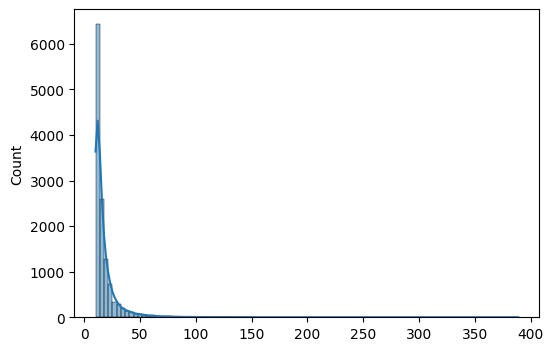

In [ ]:
# Making the Histogram
user_rating = df.groupby('UserId')['Rating'].count()
user_rating = user_rating.values

plt.figure(figsize=(6,4))
sns.histplot(user_rating, kde=True, bins = 100)

Data is highly right Skewed

In [36]:
# Top, bottom 10 item based on rating
most_rated = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)[:10]
least_rated = df.groupby('ProductId')['Rating'].count().sort_values(ascending=False)[-10:]
most_rated, least_rated

(ProductId
 B001MA0QY2    7533
 B0009V1YR8    2869
 B0043OYFKU    2477
 B0000YUXI0    2143
 B003V265QW    2088
 B000ZMBSPE    2041
 B003BQ6QXK    1918
 B004OHQR1Q    1885
 B00121UVU0    1838
 B000FS05VG    1589
 Name: Rating, dtype: int64,
 ProductId
 B005O0LS6G    1
 B005O0BGLS    1
 1929099886    1
 1304651088    1
 130465110X    1
 1304651118    1
 1304651347    1
 1304665704    1
 130466578X    1
 1304622452    1
 Name: Rating, dtype: int64)

<Axes: ylabel='Count'>

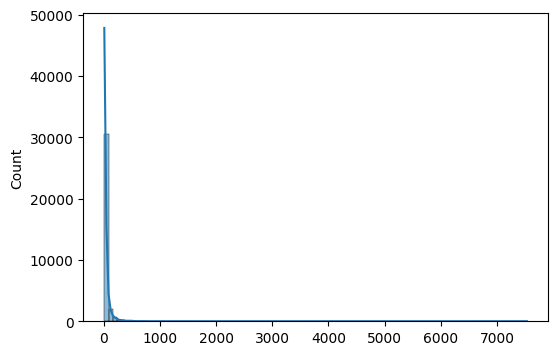

In [ ]:
product_rating = df.groupby('ProductId')['Rating'].count()
product_rating = product_rating.values

plt.figure(figsize=(6,4))
sns.histplot(product_rating, kde=True, bins = 100)

This data is also highly right skewed

<Axes: ylabel='Count'>

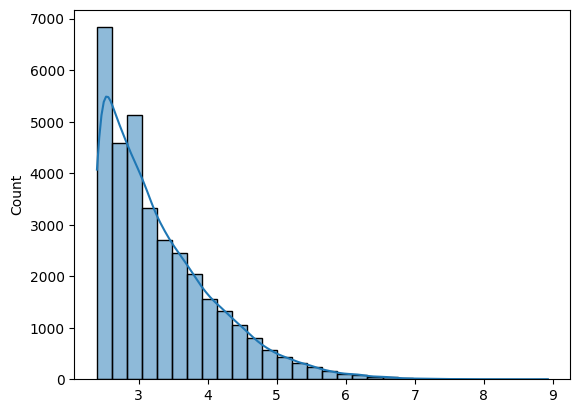

In [55]:
sns.histplot(np.log(product_rating), kde=True, bins = 30)

<Axes: >

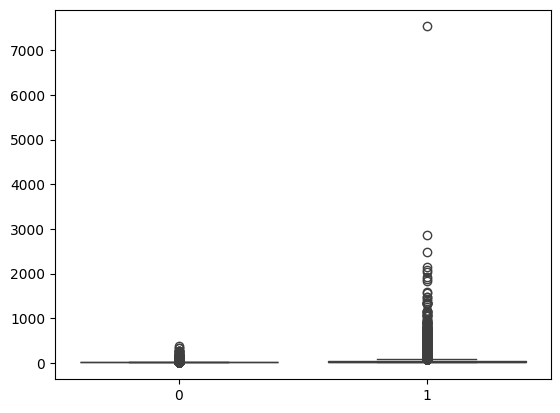

In [ ]:
sns.boxplot([user_rating, product_rating])

In [65]:
df[df.ProductId=='B001MA0QY2']['Rating'].value_counts()

Rating
5.0    5107
4.0    1084
1.0     485
3.0     483
2.0     374
Name: count, dtype: int64

These Values are so sparsed

PreProcessign

In [75]:
counts = df['UserId'].value_counts()
df_final = df[df['UserId'].isin(counts[counts >= 25].index)]

counts = df_final['ProductId'].value_counts()
df_final = df_final[df_final['ProductId'].isin(counts[counts >= 30].index)]

df_final.shape

(11023, 3)

In [76]:
df_final.head()

,UserId,ProductId,Rating
51631,A3C1A0LLYASWD4,B000142FVW,5.0
51641,A2D1LPEUCTNT8X,B000142FVW,5.0
51646,A2HD9JTLRSC9IL,B000142FVW,4.0
51650,A1M6NMY95XMOLG,B000142FVW,5.0
51693,A2OTGX253O4J4D,B000142FVW,5.0


<Axes: >

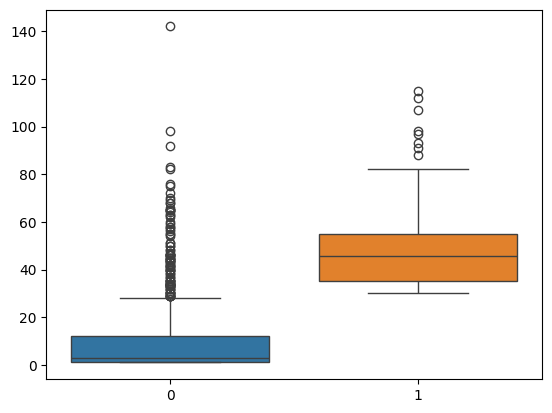

In [77]:
user_rating = df_final.groupby('UserId')['Rating'].count()
user_rating = user_rating.values

product_rating = df_final.groupby('ProductId')['Rating'].count()
product_rating = product_rating.values

sns.boxplot([user_rating, product_rating])

In [78]:
df_final.Rating.value_counts()

Rating
5.0    4765
4.0    3639
3.0    1654
2.0     662
1.0     303
Name: count, dtype: int64

In [80]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['UserId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['ProductId'].nunique())

The number of observations in the final data = 11023
Number of unique USERS in the final data =  1124
Number of unique PRODUCTS in the final data =  230


We will be using the final_df for making models and would be used to predict the recomendations.

Checking the density of the rating matrix

In [87]:
matrix = df_final.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0).astype('int8')
matrix

ProductId,B000142FVW,B00016XJ4M,B0002Z8HAI,B000AO2NXS,B000E0K7NQ,B000FBNV1Y,B000H8UN3Y,B000HRVC5I,B000PHRIQM,B000TKH6G2,...,B00HM6IVXI,B00HM6K6XQ,B00HNKRWI8,B00HSNWXVQ,B00HSNX1AS,B00I073WLE,B00IDWP4IA,B00IP42FBA,B00IT1HKV4,B00IT69F62
UserId,,,,,,,,,,,,,,,,,,,,,
A03364251DGXSGA9PSR99,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A103979529MRJY0U56QI4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A103BJIOJSDJL1,0,0,0,5,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ9JPUSCI0V49,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
AZA595ZPIG240,0,0,0,5,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZFHSPEZUPGD2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
matrix.size, matrix.shape, str(df.memory_usage().sum()/1024**2) + "MB"

(258520, (1124, 230), '46.30452346801758MB')

In [89]:
#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = matrix.shape[0] * matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))


given_num_of_ratings =  11023
possible_num_of_ratings =  258520
density: 4.26%


We have more than 4% of the values in  matrix

In [90]:
df_final.to_csv('Data/Processed_matrix.csv')